Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

# Week4 Assignment - Regression.

For this assignment, you will use the Ames housing dataset. The basic goal of this assignment is to predict housing prices for houses in Ames, Iowa.

In the first component, you will load the training dataset and convert it into a Pandas dataframe.

In the second component, you will plot the data. This component is ungraded.

In the third component, you will preprocess the data.

In the fourth component, you will build a linear regression model.

In the fifth component, you will build a random forest model.

All the exercises are designed so that the solutions will need only one or a few lines of code.

Do not hesitate to contact instuctors and TA via #week4 channel on Slack if you get stuck. Join the channel first by clicking on Channels.

## Part A. Read in the Ames dataset. 

In this component you will read the Ames housing dataset into a Pandas data frame. This dataset contains samples of Ames houses, with multiple features. The value we want to predict is the cost of given house.

Make sure you download the ames_train.csv file from the course website. Do not manually modify the ames datasets.

Save to a data frame named ames_data.

In [1]:
import pandas as pd
import numpy as np

# Load the ames dataset into a pandas dataframe
# Make sure to save as "ames_data"

# YOUR CODE HERE
ames_data = pd.read_csv('ames_train.csv')

# You can make sure you loaded it correctly by looking at its first few rows, using the .head() function
#print(ames_data.head())

In [2]:
assert isinstance(ames_data, pd.core.frame.DataFrame)
assert ames_data.shape == (1460, 81)
assert ames_data["FirstFlrSF"].sum() == 1697435
assert ames_data["SecondFlrSF"].sum() == 506609
assert ames_data.isnull().sum().sum() == 6965

AssertionError: 

## Part B. Plot the data.
Now that we've loaded the data, let's take a look at some features.

Perhaps naively, you think that the best predictors for house prices are the square footage values ("FirstFlrSF", "SecondFlrSF").

Go ahead and plot a histogram of each, to get an idea of their distributions. See if you see anything interesting.

Following this, maybe try to get feel of the relationship between each of these and our target ("SalePrice", the house prices). Plot a scatter plot with SalePrice on the Y axis and FirststFlrSF on the X axis. Does it look like it may be a good predictor? What about SecondFlrSF?

What about the sum of the two? Plot a scatter plot with SalePrice on the Y axis and the sum of FirstFlrSF and SecondFlrSF on the X axis.

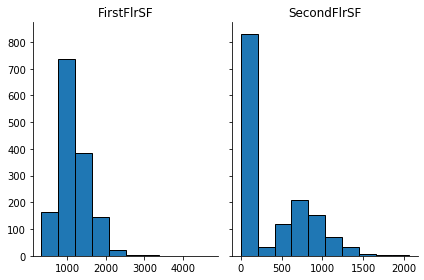

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(ames_data['FirstFlrSF'], edgecolor='black')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].title.set_text('FirstFlrSF')


axs[1].hist(ames_data['SecondFlrSF'], edgecolor='black')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].title.set_text('SecondFlrSF')

Text(0, 0.5, 'SalePrice')

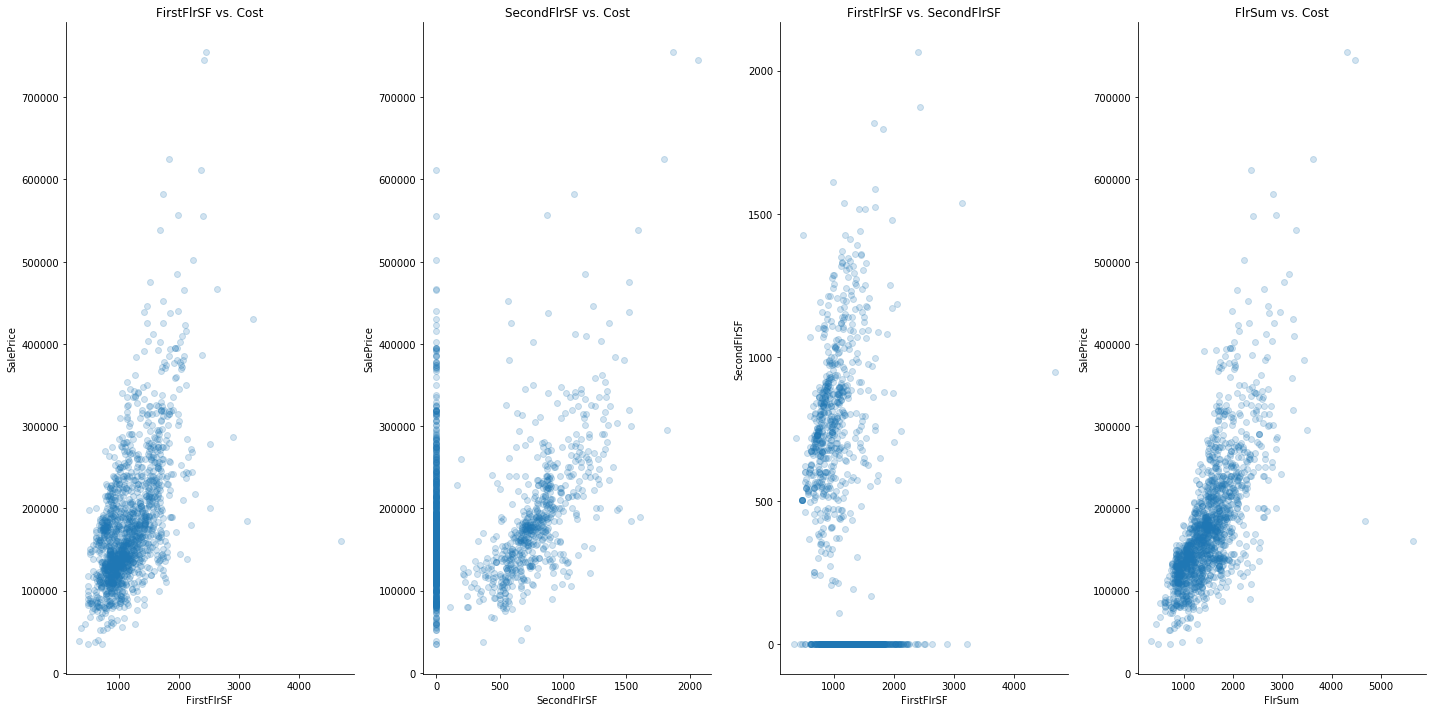

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10), tight_layout = True)

alpha_val = .2

ax[0].scatter(ames_data['FirstFlrSF'], ames_data['SalePrice'], alpha = alpha_val)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].title.set_text('FirstFlrSF vs. Cost')
ax[0].set_xlabel('FirstFlrSF')
ax[0].set_ylabel('SalePrice')

ax[1].scatter(ames_data['SecondFlrSF'], ames_data['SalePrice'], alpha = alpha_val)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].title.set_text('SecondFlrSF vs. Cost')
ax[1].set_xlabel('SecondFlrSF')
ax[1].set_ylabel('SalePrice')

ax[2].scatter(ames_data['FirstFlrSF'], ames_data['SecondFlrSF'], alpha = alpha_val)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].title.set_text('FirstFlrSF vs. SecondFlrSF')
ax[2].set_xlabel('FirstFlrSF')
ax[2].set_ylabel('SecondFlrSF')

ax[3].scatter(ames_data['FirstFlrSF'] + ames_data['SecondFlrSF'], ames_data['SalePrice'], alpha = alpha_val)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].title.set_text('FlrSum vs. Cost')
ax[3].set_xlabel('FlrSum')
ax[3].set_ylabel('SalePrice')

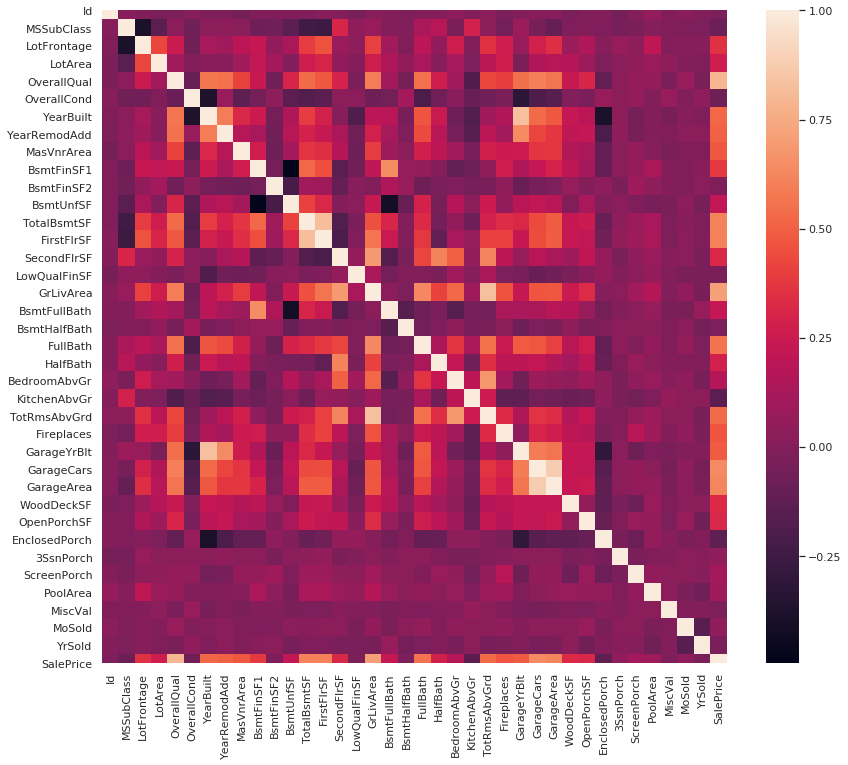

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,12)})

ames_corr = ames_data.corr()

sns.heatmap(ames_corr)

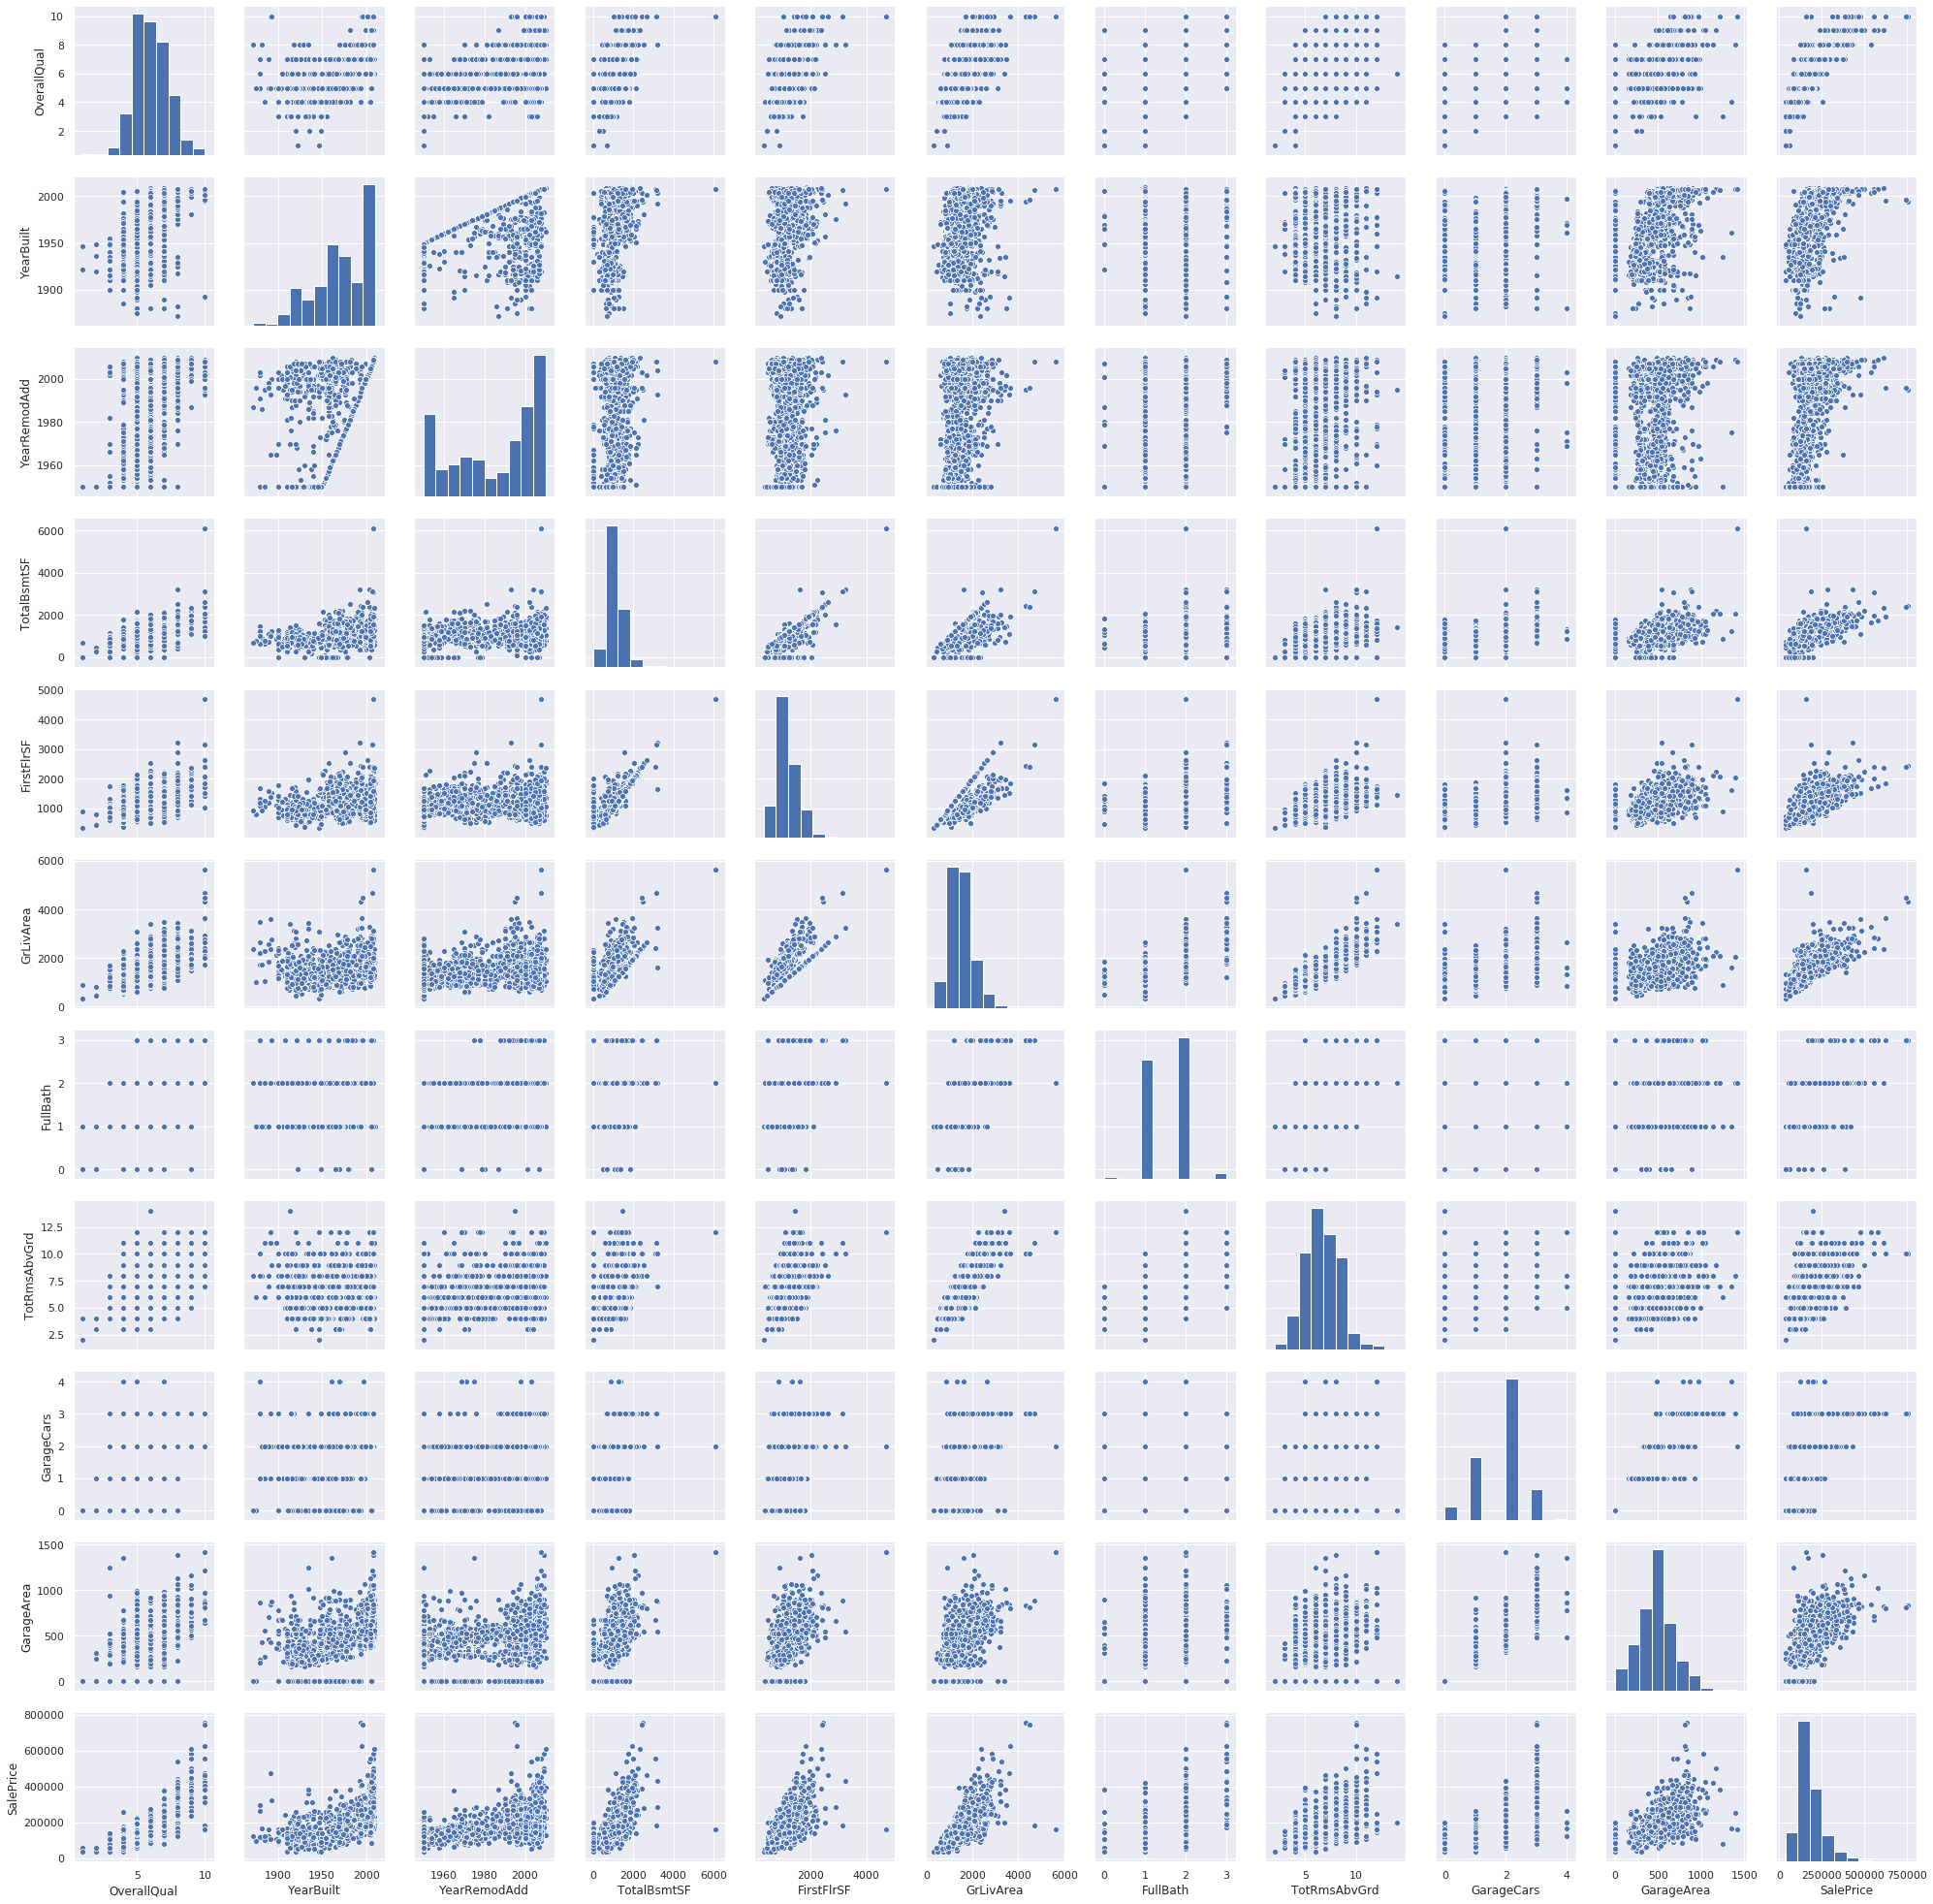

In [7]:
refined_corr_list = ames_corr[ames_corr['SalePrice'] > .5].index.tolist()

refined_corr_df = ames_data[refined_corr_list]

sns.pairplot(refined_corr_df)

## Part C. Preprocess the data.

It looks like the sum of FirstFlrSF and SecondFlrSF may be good predictors.

Create a new column, named sqft_sum, that contains the summation of these two.

In [8]:
# YOUR CODE HERE
ames_data['sqft_sum'] = ames_data['FirstFlrSF'] + ames_data['SecondFlrSF']

In [9]:
assert ames_data.shape == (1460, 82)
assert "sqft_sum" in ames_data.columns
assert ames_data["sqft_sum"].sum() == 2204044

AssertionError: 

## Part D. Build a linear regression model.
Build a linear regression model based on the Ames data. The features you will be using are: sqft_sum and Fireplaces (the number of fireplaces in the house).

Name the model *lr*.

Once the model is trained, predict the SalePrice for the same data you trained on. Name the predictions *y_preds*.

Hints:
* Use sklearn's LinearRegression function to fit a model.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
ames_data['sqft_sum']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: sqft_sum, Length: 1460, dtype: int64

In [12]:
# init
lr = LinearRegression(fit_intercept=False)

# Learning
lr.fit(ames_data[['sqft_sum', 'Fireplaces']], ames_data[['SalePrice']]) # I guess I could have picked an unlimited number of vars to improve the predictive power

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [13]:
# Learned model w and b:
lr.coef_
lr.score(ames_data[['sqft_sum', 'Fireplaces']], ames_data[['SalePrice']])

0.5286268458743466

In [14]:
# Predict values
y_preds = lr.predict(ames_data[['sqft_sum', 'Fireplaces']])
np.sqrt(mean_squared_error(ames_data[['SalePrice']], y_preds))

NameError: name 'mean_squared_error' is not defined

In [15]:
from sklearn.metrics import mean_squared_error

assert isinstance(lr, LinearRegression)
assert np.isclose(y_preds.sum(), 264144945.99999997)
assert np.isclose(np.sqrt(mean_squared_error(y, y_preds)), 54087.066902509694)

AssertionError: 

## Part E. Build a random forest model.
Build a random forest model based on the Ames data. The features you will be using are: sqft_sum and Fireplaces (the number of fireplaces in the house).

Name the model *rf*.

Once the model is trained, predict the SalePrice for the same data you trained on. Name the predictions *y_preds*.

Hints:
* Use sklearn's RandomForestRegressor function to fit a model.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42) # do not remove this line

ames_subset = ames_data[['sqft_sum', 'Fireplaces', 'SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(ames_data[['sqft_sum', 'Fireplaces']], ames_data['SalePrice'], test_size = .33, random_state = 42)

In [46]:
# YOUR CODE HERE
rf = RandomForestRegressor()

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test
mse = mean_squared_error(y_test, y_predicted)

np.sqrt(mse)

/home/shane/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


55321.012128414404

In [ ]:
from sklearn.metrics import mean_squared_error

assert isinstance(rf, RandomForestRegressor)
assert np.isclose(np.sqrt(mean_squared_error(y, y_preds)), 28891.016368235392)

# Hyperparameter tuning

In [49]:
from sklearn.model_selection import KFold, GridSearchCV

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

gscv = GridSearchCV(
    rf, # estimator
    {"max_depth": range(1, 20), "n_estimators": range(2, 20)}, # hyperparameters to tune
    cv=kf, # cross validation generator
    n_jobs=-1 # pretty sure this just determines how you use your cpu power
)

gscv.fit(ames_data[['sqft_sum', 'Fireplaces']], ames_data['SalePrice'])

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=3, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 20)

In [50]:
cv_df = pd.DataFrame(gscv.cv_results_)
piv_df = cv_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
piv_df.style.background_gradient("nipy_spectral", axis=None)

param_n_estimators,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
param_max_depth,,,,,,,,,,,,,,,,,,
1,0.314,0.328,0.363,0.357,0.382,0.37,0.382,0.373,0.366,0.355,0.385,0.385,0.385,0.377,0.377,0.38,0.387,0.367
2,0.434,0.461,0.473,0.473,0.481,0.468,0.468,0.499,0.461,0.477,0.48,0.477,0.478,0.476,0.484,0.49,0.496,0.467
3,0.431,0.461,0.535,0.473,0.491,0.501,0.498,0.494,0.509,0.477,0.505,0.497,0.505,0.52,0.492,0.502,0.488,0.508
4,0.467,0.487,0.459,0.503,0.486,0.495,0.482,0.503,0.499,0.486,0.505,0.479,0.479,0.499,0.484,0.502,0.49,0.49
5,0.505,0.448,0.491,0.466,0.476,0.491,0.512,0.468,0.484,0.493,0.501,0.508,0.483,0.501,0.488,0.484,0.504,0.494
6,0.468,0.492,0.5,0.491,0.501,0.481,0.474,0.457,0.481,0.471,0.501,0.48,0.481,0.521,0.483,0.482,0.484,0.489
7,0.399,0.393,0.446,0.48,0.485,0.444,0.49,0.497,0.483,0.476,0.465,0.462,0.466,0.47,0.483,0.492,0.47,0.483
8,0.452,0.461,0.426,0.473,0.448,0.47,0.454,0.457,0.438,0.459,0.447,0.44,0.463,0.461,0.461,0.462,0.462,0.464
9,0.354,0.371,0.39,0.429,0.399,0.46,0.425,0.443,0.454,0.444,0.442,0.44,0.419,0.447,0.453,0.459,0.442,0.435


In [52]:
piv_df.max()

param_n_estimators
2     0.505
3     0.492
4     0.535
5     0.503
6     0.501
7     0.501
8     0.512
9     0.503
10    0.509
11    0.493
12    0.505
13    0.508
14    0.505
15    0.521
16    0.492
17    0.502
18    0.504
19    0.508
dtype: float64